# Lecture 5

This lecture covers linear difference equations (recurrence equations). Below are some examples solved using SymPy.

We first import the necessary modules:

In [1]:
from sympy import *
init_printing()
from IPython.display import display

from fractions import Fraction

# Support for interactive plots
from ipywidgets import interact

%matplotlib inline

## Student grant example

This example is covered in the lecture (solved by hand). Here it is solved using SymPy.

The difference equation (non-homegeneous case) for the student grant example from the lecture notes has the form

$$
y_{n} - 2.95 y_{n-1} + 2 y_{n-2} = −(63.685)(1.07^{n})
$$

We first define $n$ as an integer symbol and $y$ as a function:

In [2]:
n = Symbol("n", integer=True)
y = Function("y")

Now, we define the difference equation:

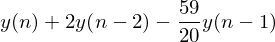

In [3]:
f = y(n) - Fraction(295, 100)*y(n - 1) + 2*y(n - 2)
display(f)

We'll solve the homogeneous version of the equation using `rsolve`. To compare to the solution in the lecture notes, we'll also evaluate the the solution in floating point:

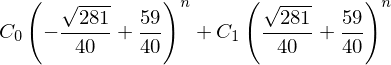

In [4]:
eqn = Eq(f, 0)
soln = rsolve(eqn, y(n))
display(soln)
soln.evalf()

The solution is the same as in the lecture notes.

We now consider the non-homogeneous case:

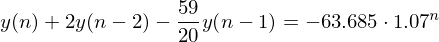

In [5]:
# Create non-homogeneous equation
eqn = Eq(f, -63.685*(1.07**n))
display(eqn)

Solving the non-homogeneous equation, on this occasion providing the initial conditions $y(0) = 2000$ and $y(1) = 2200$,

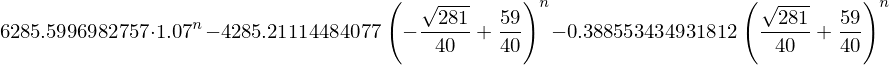

In [6]:
soln = rsolve(eqn, y(n), init={y(0) : 2000, y(1) : 2200})
display(soln)
soln.evalf()

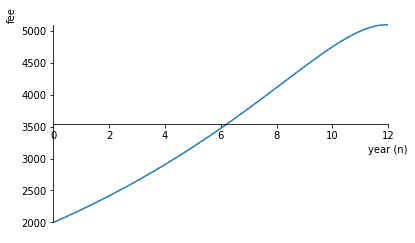

Fee after 10 years (n=10): 4749.72910622520


In [7]:
# Plot
plot(soln, (n, 0, 12), xlabel="year (n)", ylabel="fee")

# Evaluate fee at 10 years
print("Fee after 10 years (n=10): {}".format(soln.subs(n, 10).evalf()))

## General case

Below is the general case for a constant coefficient, second-order difference equation.

In [8]:
n = Symbol("n", integer=True)
y = Function("y")

a, b, c = symbols("a b c")

f = a*y(n) - b*y(n - 1) + c*y(n - 2)
display(f)

Solving for the homogeneous case,

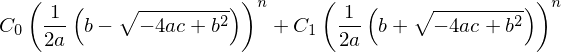

In [9]:
eqn = Eq(f, 0)
soln = rsolve(eqn, y(n))
display(soln)

The above is a general solution. Solving for some initial conditions,

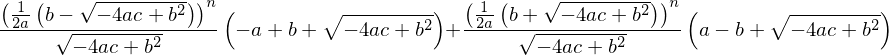

In [10]:
soln = rsolve(eqn, y(n), init={y(0) : 2, y(1) : 1})
display(soln)

If we now specify the values for the constants, the solution can be plotted:

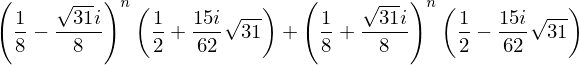

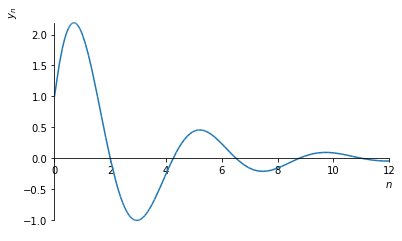

In [11]:
eqn1 = eqn.subs('a', 4).subs('b', 1).subs('c', 2)
soln = rsolve(eqn1, y(n), init={y(0) : 1, y(1) : 2})
display(soln)

plot(soln, (n, 0, 12), xlabel="$n$", ylabel="$y_{n}$");

## Interactive solution

With an interactive plot, we can see how the form of the solution changes with changing constants in the difference equation.

We first define the difference equation:

In [12]:
f = a*y(n) - b*y(n - 1) + c*y(n - 2)
eqn = Eq(f, 0)
display(eqn)

Solving and plotting:

In [13]:
def plot_solution(a=6, b=1, c=8):
    # Substitute in parameters
    eqn1 = eqn.subs('a', a).subs('b', b).subs('c', c)
    
    # Check roots
    roots = ((-b - sqrt(b**2 - 4*a*c))/(2*a), (-b + sqrt(b**2 - 4*a*c))/(2*a))
    print("Roots of characteristic eqn:")
    display(roots)

    # Solve
    soln = rsolve(eqn1, y(n), init={y(0) : 1, y(1) : 2})
    print("Solution:")
    display(soln)
    
    # Plot
    plot(soln, (n, 0, 20), xlabel="$n$", ylabel="$y_n$", axis_center="auto", adaptive=False, nb_of_points=21)

    
interact(plot_solution, a=(-10, 11, 2), b=(-2, 20, 1), c=(1, 10, 1), continuous_update=False);

interactive(children=(IntSlider(value=6, description='a', max=11, min=-10, step=2), IntSlider(value=1, description='b', max=20, min=-2), IntSlider(value=8, description='c', max=10, min=1), Output()), _dom_classes=('widget-interact',))